# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Machine Learning Project

by Thalisson da Silva Schumaher nº30035

---



# Project Report for ML Evaluation and Validation

## Project: `Exploratory Data Analysis and Predictive Modeling`

### Project Overview

```
 This project applys the basic machine learning concepts on data collected for Breast Cancer to predict the diagnosis of a patient with cancer
Firstly the data is explored to obtain important features and descriptive statistics about the dataset.
Next, the data is prepared and splited accordingly on testing and training subsets, and suitable performance metric for this problem are determined.
Follow the performance analysis the used learning algorithm with varying parameters and training set sizes.
Finally, the optimal model will be tested on a new sample and compare the predicted results to the engineered model.
The idea is to get model that best generalizes for unseen data.
```


### Problem Description

```
The Dataset of Breast Cancer Wisconsin (Diagnostic)
 The goal of this project is to get a model that best generalizes for unseen data explore a dataset.
 For this I'm gonna explore the dataset and optmize it whenever possible throught data cleaning, data engineering and other tools and get it optmized to be used with a classification model
 For the model the aim is to tune it to perform the best as possible throught experimentation.

```



### Software and Libraries

```
This project explored the following software and Python libraries:
- [Python](https://www.python.org/download/releases/3.0/)
- [NumPy](http://www.numpy.org/)
- [pandas](https://pandas.pydata.org/)
- [sklearn](https://scikit-learn.org/stable/)
- [matplotlib](https://matplotlib.org/)
- [seaborn](https://seaborn.pydata.org/)
- [joblib](https://joblib.readthedocs.io/en/stable/)
```

## Training Data



The dataset is used for the task of binary classification to predict whether a breast tumor is malignant (cancerous) or benign (non-cancerous) based on various features extracted from digitized images of fine needle aspirates (FNA) of breast masses.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

Main features:

    ID - Unique identification number for each sample.

    Diagnosis (Target)- The binary class label indicating whether the tumor is malignant (M) or benign (B).

    Ten numeric Features- These features are computed for each cell nucleus present in the image, describing various properties such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.

In [149]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib


In [150]:
# Load dataset
df = pd.read_csv("data.csv")


# Dataset Attributes/Metadata
print("Dataset Shape:", df.shape)
print("\nDataset Columns:", df.columns)
print("\nDataset Info:")
print(df.info())


# Summarizing Data
print("\nDataset Summary:")
print(df.describe())

# Descriptive statistics
print("\nDescriptive Statistics for texture mean:")
print(df['texture_mean'].describe())


Dataset Shape: (498, 32)

Dataset Columns: Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       498 non-null    int64  
 1   diagnosis           

### Data visualization

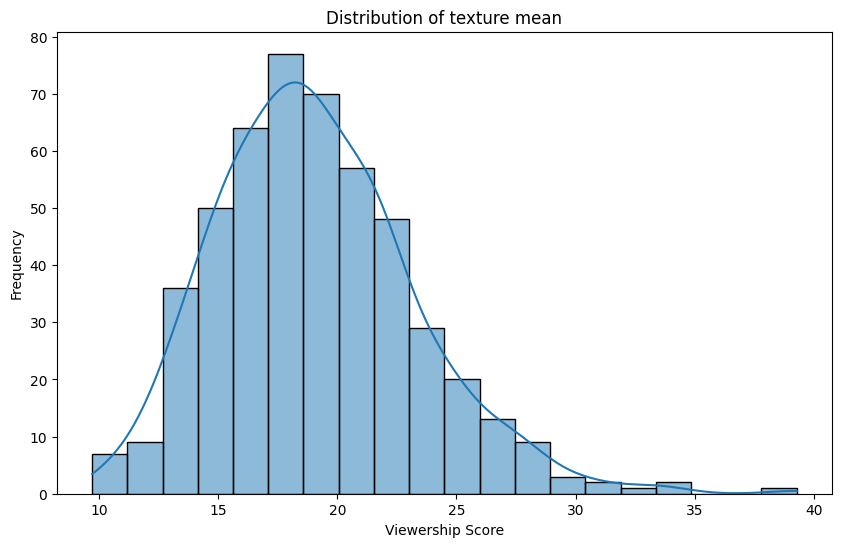

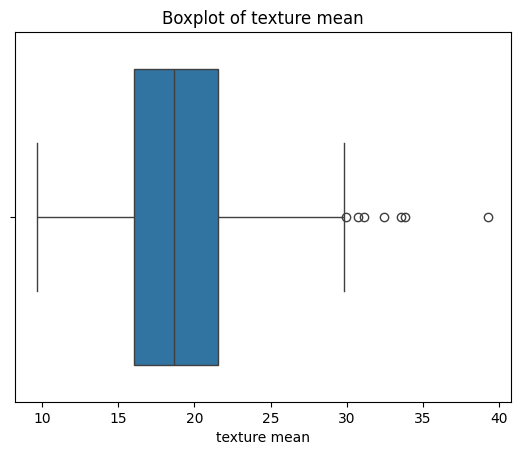

In [151]:
# Visualize distribution of texture mean
plt.figure(figsize=(10, 6))
sns.histplot(df['texture_mean'], bins=20, kde=True)
plt.title("Distribution of texture mean")
plt.xlabel("Viewership Score")
plt.ylabel("Frequency")
plt.show()


# Identify outliers using boxplot
sns.boxplot(x=df['texture_mean'])
plt.xlabel('texture mean')
plt.title('Boxplot of texture mean')
plt.show()

## Data Preparation




### Data identification

In [152]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Check duplicates

In [153]:
original_rows = len(df)
df.drop_duplicates(inplace=True)
new_rows = len(df)
print(f"Number of duplicate rows removed: {original_rows - new_rows}")


Number of duplicate rows removed: 0


The dataset contains no duplicate rows

### Dealing with outliers

In [154]:
summary_stats = df.describe()

# Transpose the summary statistics DataFrame for better readability
summary_stats = summary_stats.T

# Display the summary statistics for each column
print(summary_stats)


                         count          mean           std          min   
id                       498.0  3.275952e+07  1.329443e+08  8670.000000  \
radius_mean              498.0  1.420286e+01  3.466733e+00     6.981000   
texture_mean             498.0  1.908514e+01  4.171504e+00     9.710000   
perimeter_mean           498.0  9.245825e+01  2.391095e+01    43.790000   
area_mean                498.0  6.607116e+02  3.483359e+02   143.500000   
smoothness_mean          498.0  9.594273e-02  1.368029e-02     0.062510   
compactness_mean         498.0  1.037706e-01  5.311842e-02     0.019380   
concavity_mean           498.0  8.956337e-02  8.016716e-02     0.000000   
concave points_mean      498.0  4.923488e-02  3.880464e-02     0.000000   
symmetry_mean            498.0  1.813594e-01  2.777109e-02     0.116700   
fractal_dimension_mean   498.0  6.248871e-02  6.877353e-03     0.049960   
radius_se                498.0  4.086050e-01  2.819858e-01     0.111500   
texture_se               

Examining the output from the summary we can see that the columns symmetry_se and symmetry_worst show a large difference between quartiles

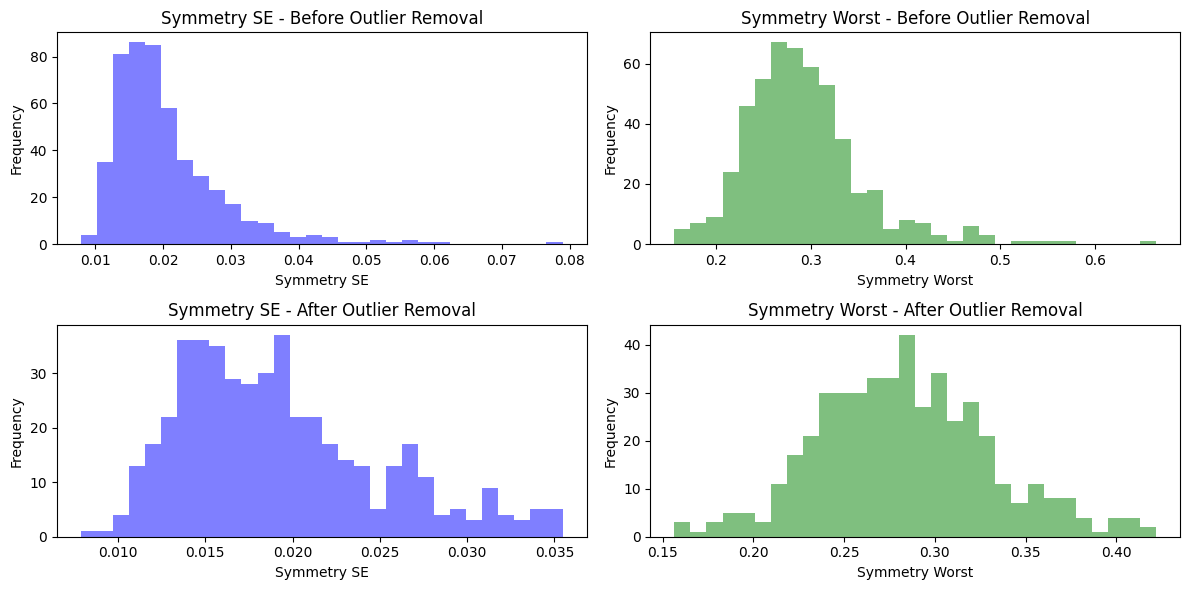

In [155]:
# Calculate the first quartile (Q1) and third quartile (Q3)
Q1_se = df['symmetry_se'].quantile(0.25)
Q3_se = df['symmetry_se'].quantile(0.75)

Q1_worst = df['symmetry_worst'].quantile(0.25)
Q3_worst = df['symmetry_worst'].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR_se = Q3_se - Q1_se
IQR_worst = Q3_worst - Q1_worst

# Define the upper and lower bounds
lower_bound_se = Q1_se - 1.5 * IQR_se
upper_bound_se = Q3_se + 1.5 * IQR_se

lower_bound_worst = Q1_worst - 1.5 * IQR_worst
upper_bound_worst = Q3_worst + 1.5 * IQR_worst

# Filter out the outliers
df_cleaned = df[(df['symmetry_se'] >= lower_bound_se) & (df['symmetry_se'] <= upper_bound_se)]
df_cleaned = df_cleaned[(df_cleaned['symmetry_worst'] >= lower_bound_worst) & (df_cleaned['symmetry_worst'] <= upper_bound_worst)]

# Plot histograms before outlier removal
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(df['symmetry_se'], bins=30, color='blue', alpha=0.5)
plt.title('Symmetry SE - Before Outlier Removal')
plt.xlabel('Symmetry SE')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(df['symmetry_worst'], bins=30, color='green', alpha=0.5)
plt.title('Symmetry Worst - Before Outlier Removal')
plt.xlabel('Symmetry Worst')
plt.ylabel('Frequency')



# Plot histograms after outlier removal
plt.subplot(2, 2, 3)
plt.hist(df_cleaned['symmetry_se'], bins=30, color='blue', alpha=0.5)
plt.title('Symmetry SE - After Outlier Removal')
plt.xlabel('Symmetry SE')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(df_cleaned['symmetry_worst'], bins=30, color='green', alpha=0.5)
plt.title('Symmetry Worst - After Outlier Removal')
plt.xlabel('Symmetry Worst')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Feature Selection

In order to check which features are the most essential for the classification process I'm gonna first execute a correlation analysis

In [156]:
#Changing the values of the diagnosis column
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})

#Drop id colunm since it has no impact in the classification process
df_cleaned.drop(['id'], axis = 1, inplace = True)

df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


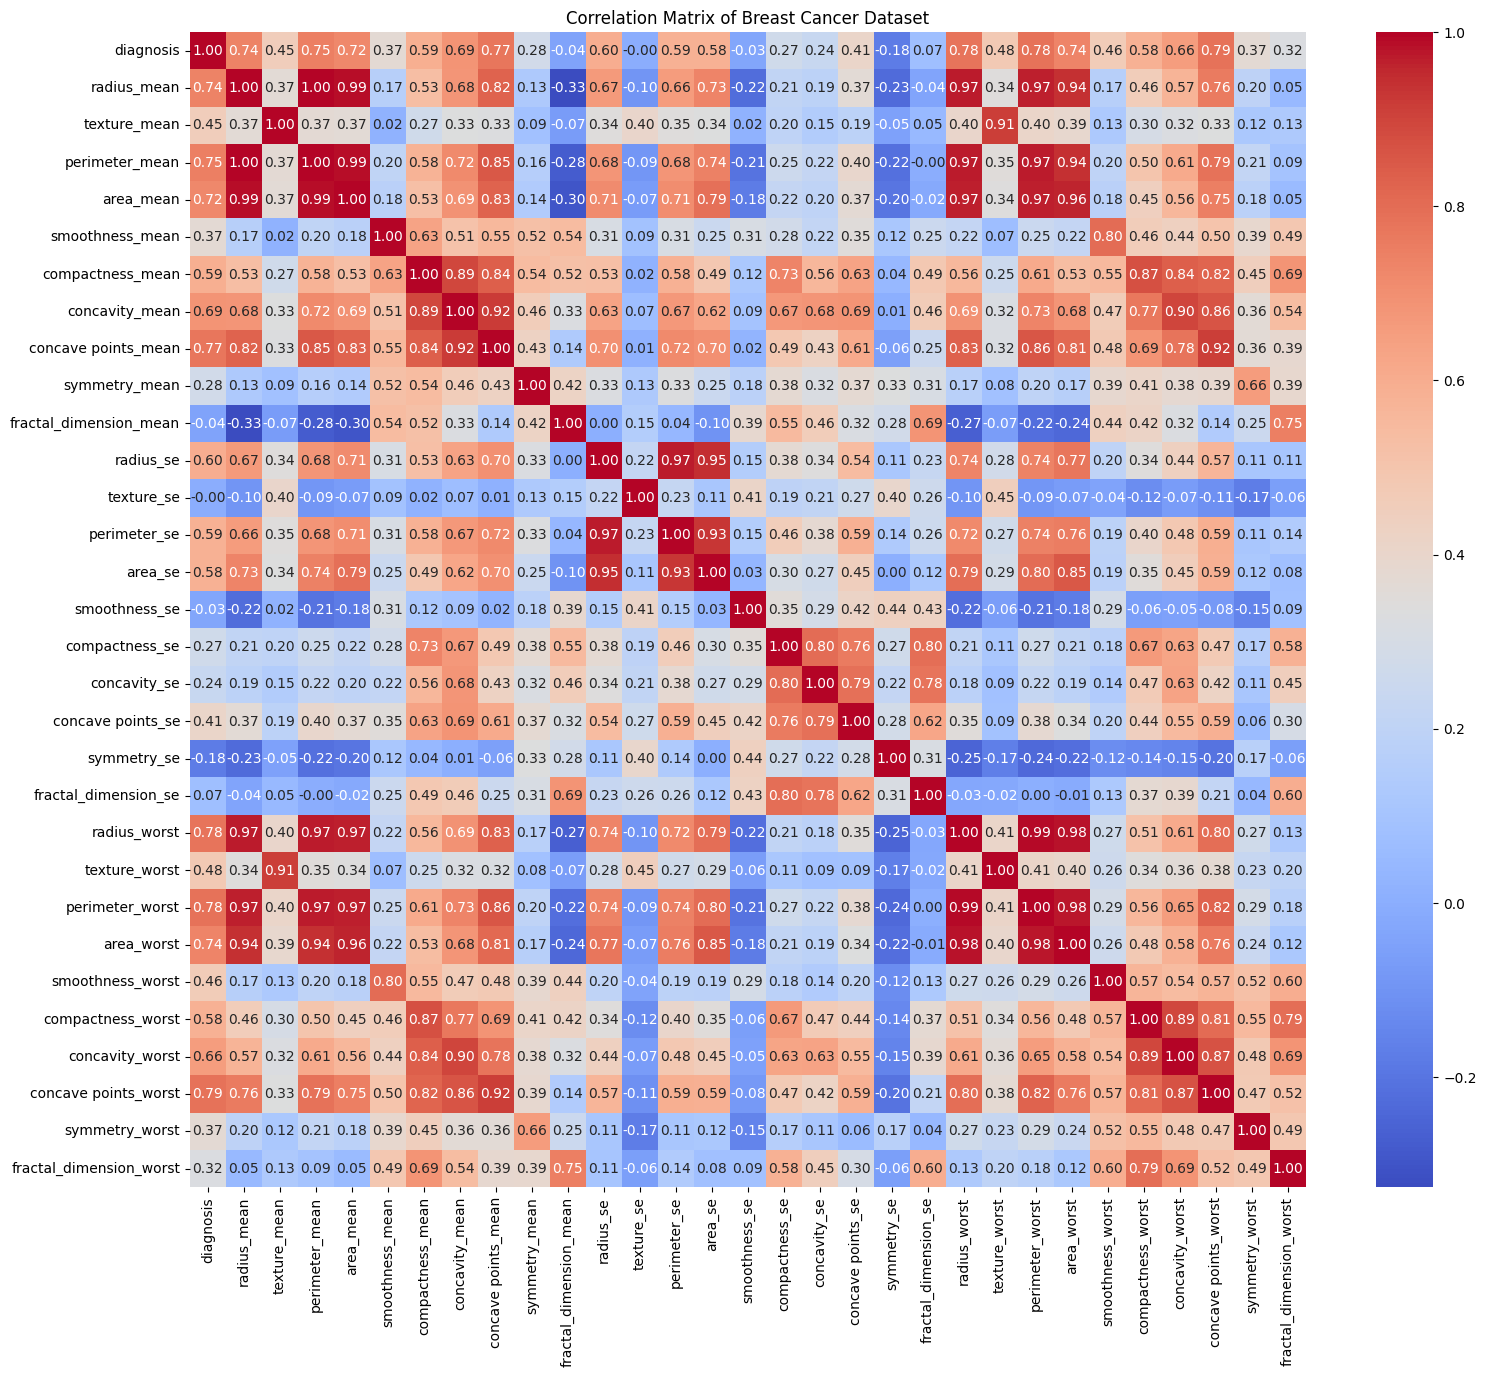

In [157]:
# Compute the correlation matrix
correlation_matrix = df_cleaned.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(18, 15))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Breast Cancer Dataset")
plt.show()

Using the Random Forest Classifier I can try to get an idea of feature importance

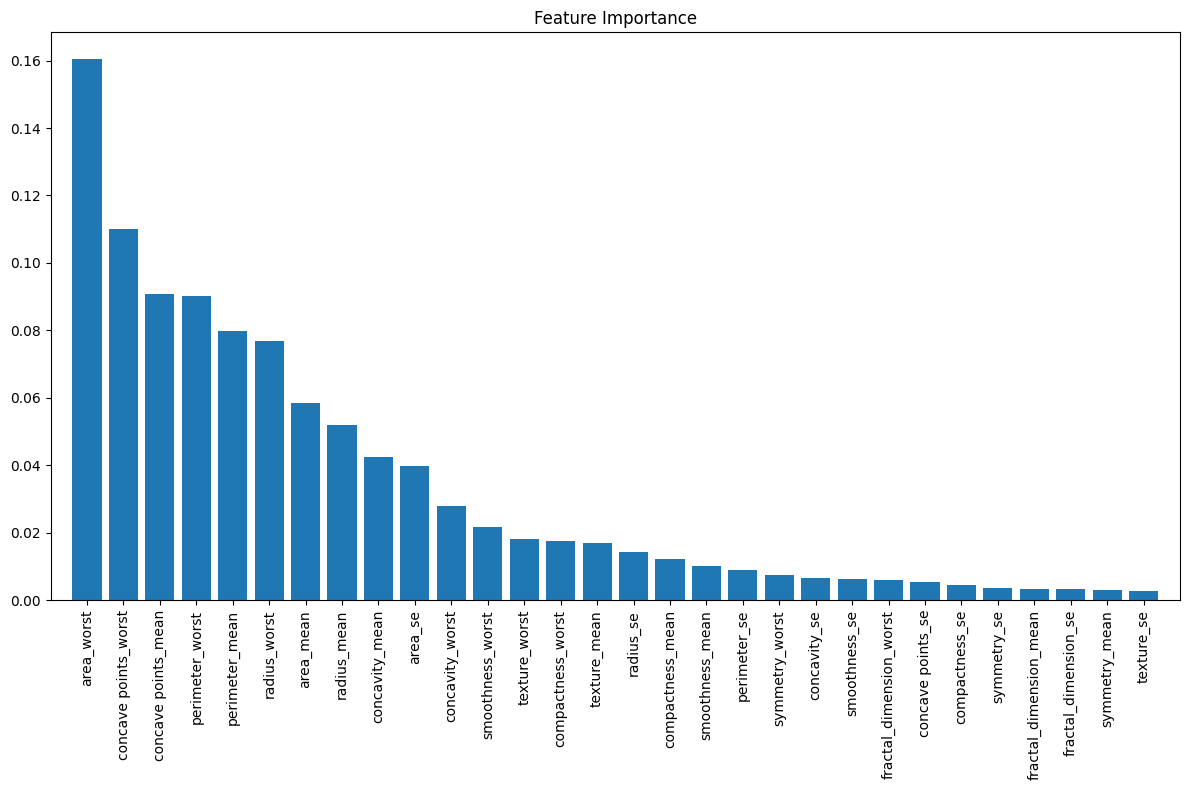

In [158]:
# Separate features
X = df_cleaned.drop(columns=['diagnosis'])
y = df_cleaned['diagnosis']

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort feature importances in descending order
indices = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show()


From these two charts and at first sight I'm assuming columns like symmetry_mean and fractal_dimension_mean don't play a big role in the classification

Later on I will validate these assumptions

In [159]:
#Current state of data
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


## Modelling



#### For the models I chose to explore Random Forest Classifier(RFC), Logistic Regression(LR) and K-Nearest Neighbors(KNN), mostly because of the following features each of them present:

##### Random Forest Classifier:

    -Ideal for handling both categorical and numerical data.
    -Effective in capturing complex relationships between features.
    -Robust to overfitting due to ensemble learning.

##### Logistic Regression:

    -Good for binary classification problems.
    -Provides probabilities for outcomes.
    -Simple and interpretable.
    -Works well when features are linearly separable.

##### K-Nearest Neighbors (KNN):

    -Non-parametric, so no assumptions about the data distribution.
    -Can capture complex patterns in the data.
    -Easy to understand and implement.
    

## Modelling Evaluation




### Prepare data for training and testing

In [160]:
# Separate features and target variable
X = df_cleaned.drop('diagnosis', axis=1)
y = df_cleaned['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


##### For each model I'm comparing them by using the confusion matrix, classification report and cross-validation

### K-Nearest Neighbors

In [161]:
# Initialize the KNN classifier
k = 5
knn = KNeighborsClassifier(n_neighbors=k)

# Train the classifier
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.978494623655914


#### Model Improvement

In [162]:
# Hyperparameter Tuning
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X, y)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'n_neighbors': 11}
Best Score: 0.9372136512388967


In [163]:
# Initialize the new KNN classifier with suggested n_neighbors
k_best_parameter = 11
knn_best_parameter = KNeighborsClassifier(n_neighbors=k_best_parameter)

# Train the classifier
knn_best_parameter.fit(X_train_scaled, y_train)

# Predictions
y_pred_best_paramenter = knn_best_parameter.predict(X_test_scaled)

# Evaluate the model
accuracy_best_paramenter = accuracy_score(y_test, y_pred_best_paramenter)
print("Accuracy with suggested n_neighbors:", accuracy_best_paramenter)

Accuracy with suggested n_neighbors: 0.978494623655914


Even tho we get the n_neighbors as 11 suggestion, the initial k value of 5 still gives a better accuracy

In [164]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)

# Cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Confusion Matrix:
 [[59  0]
 [ 2 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        59
           1       1.00      0.94      0.97        34

    accuracy                           0.98        93
   macro avg       0.98      0.97      0.98        93
weighted avg       0.98      0.98      0.98        93

Cross-Validation Scores: [0.88172043 0.92391304 0.94565217 0.93478261 0.91304348]
Mean CV Accuracy: 0.9198223468910707


### Random Forest Classfier

In [165]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.967741935483871


#### Model Improvement

In [166]:
# Feature Importance
feature_importance = rf_classifier.feature_importances_
print("\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"Feature {i}: {importance}")



Feature Importance:
Feature 0: 0.04695412645344636
Feature 1: 0.02193155368725846
Feature 2: 0.057384391825169204
Feature 3: 0.07037715792384024
Feature 4: 0.008623970893753025
Feature 5: 0.006994791257080853
Feature 6: 0.062170825547099406
Feature 7: 0.054419375019333326
Feature 8: 0.005057138561046118
Feature 9: 0.004827260525270116
Feature 10: 0.015107910906448379
Feature 11: 0.004648263579259791
Feature 12: 0.009271111520737577
Feature 13: 0.03573627252909134
Feature 14: 0.005058851946370687
Feature 15: 0.007256611465730513
Feature 16: 0.005784706527229654
Feature 17: 0.00652976508168388
Feature 18: 0.005744871299161252
Feature 19: 0.004347585648927924
Feature 20: 0.10965815295638386
Feature 21: 0.018194816616282316
Feature 22: 0.07633902731433954
Feature 23: 0.17075402550547572
Feature 24: 0.01961264975547332
Feature 25: 0.013474542970016908
Feature 26: 0.030638632946564597
Feature 27: 0.10993983321117934
Feature 28: 0.0052740727797157974
Feature 29: 0.00788770374663051


Some features show an importance lower than 0.005

I will remove the undesidered features and test the model again

In [167]:
# Filter features with importance lower than 0.005
selected_features_indices = feature_importance >= 0.005
selected_features = X_train.columns[selected_features_indices]
X_train_selected = X_train.loc[:, selected_features_indices]
X_test_selected = X_test.loc[:, selected_features_indices]

# Create a Random Forest Classifier
rf_classifier_selected_features = RandomForestClassifier(n_estimators=100, random_state=42)

# Retrain the classifier with selected features
rf_classifier_selected_features.fit(X_train_selected, y_train)

# Make predictions with selected features
y_pred_selected = rf_classifier_selected_features.predict(X_test_selected)

# Calculate accuracy with selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)
print('Accuracy with selected features:', accuracy_selected)

Accuracy with selected features: 0.967741935483871


In this case removing the suggested features improved the models accuracy

In [168]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_selected)
print("\nClassification Report:")
print(class_report)

# Cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=5)
print("\nCross-validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Confusion Matrix:
[[58  1]
 [ 2 32]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        59
           1       0.97      0.94      0.96        34

    accuracy                           0.97        93
   macro avg       0.97      0.96      0.97        93
weighted avg       0.97      0.97      0.97        93


Cross-validation Scores: [0.93548387 0.94565217 0.97826087 0.93478261 0.9673913 ]
Mean CV Accuracy: 0.9523141654978963


#### Logistic Regression

In [169]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(fit_intercept=True)

# Train the classifier
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.978494623655914


#### Model optimization

In [170]:
# Hyperparameter Tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(log_reg, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1}
Best Score: 0.9727508330248057


The model doesn't really benefit from hyperparameter tuning

## Finalize Model



#### Predictions on validation dataset

In [171]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Initialize and train the logistic regression classifier
log_reg_val = LogisticRegression()
log_reg_val.fit(X_train_scaled, y_train)

#  Make predictions on the validation dataset
y_pred_val = log_reg_val.predict(X_val_scaled)

#  Evaluate the model
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Accuracy on validation set:", accuracy_val)
print("Classification Report on validation set:\n", classification_report(y_val, y_pred_val))


Accuracy on validation set: 0.978494623655914
Classification Report on validation set:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        59
           1       0.97      0.97      0.97        34

    accuracy                           0.98        93
   macro avg       0.98      0.98      0.98        93
weighted avg       0.98      0.98      0.98        93



#### Create standalone model on entire training dataset

In [172]:
#  Save the model
model_filename = "logistic_regression_model.pkl"
joblib.dump(log_reg, model_filename)


['logistic_regression_model.pkl']

#### Testing the model

In [173]:
# Load the saved logistic regression model
loaded_model = joblib.load("logistic_regression_model.pkl")

# Load unseen data
df = pd.read_csv("unseen.csv")

# Separate features and target variable
df.drop(['id'], axis = 1, inplace = True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
X_unseen = df.drop('diagnosis', axis=1)
y_unseen = df['diagnosis']

# Feature scaling
scaler = StandardScaler()
X_unseen_scaled = scaler.fit_transform(X_unseen)


# Use the model to make predictions
predictions = loaded_model.predict(X_unseen_scaled)


# Predictions on the validation dataset
val_predictions = log_reg.predict(X_unseen_scaled)

# Evaluate the model on the validation dataset
val_accuracy = accuracy_score(y_unseen, val_predictions)
print("Validation Accuracy:", val_accuracy)

print("Classification Report on Validation Data:\n", classification_report(y_unseen, val_predictions))



Validation Accuracy: 0.9859154929577465
Classification Report on Validation Data:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.95      1.00      0.97        19

    accuracy                           0.99        71
   macro avg       0.97      0.99      0.98        71
weighted avg       0.99      0.99      0.99        71



### Source Code


```
# Git Repositoriy
```



### Finally

```
Prepare the Dataset to be published in Kaggle
```

